In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [13]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
df.sort_values(by='Date')

data=df.groupby(['Date'])['Infected'].agg(np.sum).reset_index()
#data['confirmed']=data['Infected'].cumsum()
data

,Date,Infected
0,01-04-2020,394
1,02-03-2020,2
2,03-02-2020,3
3,03-03-2020,2
4,04-03-2020,20
5,05-03-2020,1
6,06-03-2020,2
7,07-03-2020,3
8,08-03-2020,5
9,09-03-2020,7


In [34]:
data['days']=np.arange(0, len(data), 1)
data=data[['days', 'confirmed']]
data

,days,confirmed
0,0,394
1,1,396
2,2,399
3,3,401
4,4,421
5,5,422
6,6,424
7,7,427
8,8,432
9,9,439


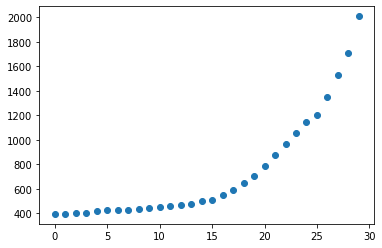

In [9]:

plt.scatter(data['days'], data['confirmed'])


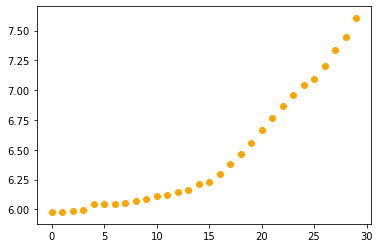

In [10]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [11]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

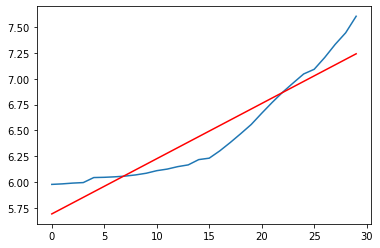

In [12]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

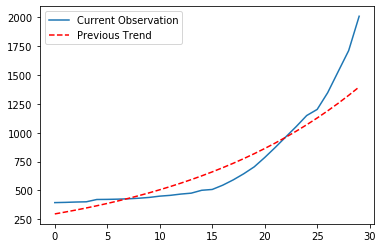

In [13]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [14]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.8759037479032687

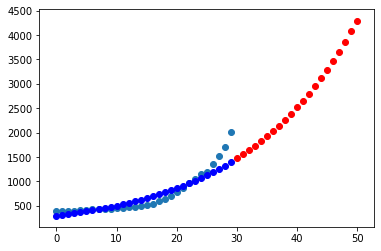

In [15]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [16]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50]),
 array([[1473.67355515],
        [1554.67517626],
        [1640.12911491],
        [1730.28009623],
        [1825.38629684],
        [1925.72008425],
        [2031.56879686],
        [2143.23556687],
        [2261.04018834],
        [2385.32003309],
        [2516.43101685],
        [2654.74861851],
        [2800.66895547],
        [2954.60991803],
        [3117.01236617],
        [3288.34139206],
        [3469.08765203],
        [3659.76877175],
        [3860.93082854],
        [4073.14991534],
        [4297.03379044]]))

In [17]:
dt=df.groupby(['Date'])['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt

,Date,Infected,confirmed
0,01-04-2020,394,394
1,02-03-2020,2,396
2,03-02-2020,3,399
3,03-03-2020,2,401
4,04-03-2020,20,421
5,05-03-2020,1,422
6,06-03-2020,2,424
7,07-03-2020,3,427
8,08-03-2020,5,432
9,09-03-2020,7,439


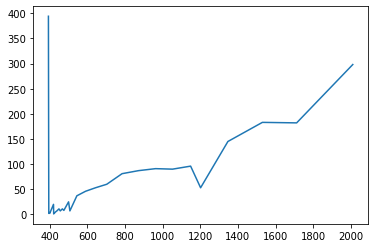

In [18]:
plt.plot(dt['confirmed'],dt['Infected'])